In [2]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker

#### Task 1a
Measure a sine signal with a fixed range of ±1 V, using a resolution of 8 bit, 12 bit and 14 bit.
Determine the size of the discretization steps from the curves and compare with the nominal
resolution.


In order to compute the discretization step, 

In [3]:
t1a8_time, t1a8_amp = np.loadtxt('./T1a/t1 8bit scope_01.csv', delimiter = ',', max_rows=35000, unpack=True)
t1a8_amp_diff = np.abs(np.diff(t1a8_amp))
t1a8_amp_diff_short = t1a8_amp_diff[t1a8_amp_diff != 0]
print(np.min(t1a8_amp_diff_short))

0.018823799999999946


In [4]:
t1a12_time, t1a12_amp = np.loadtxt('./T1a/t1 12 bit scope.csv', delimiter = ',', max_rows=35000, unpack=True, skiprows=2)
t1a12_amp_diff = np.abs(np.diff(t1a12_amp))
t1a12_amp_diff_short = t1a12_amp_diff[t1a12_amp_diff !=0]
print(np.min(t1a12_amp_diff_short))

0.0010369999999999546


In [5]:
t1a14_time, t1a14_amp = np.loadtxt('./T1a/t1 14 bit scope.csv', delimiter = ',', max_rows=35000, unpack=True, skiprows=2)
t1a14_amp_diff = np.abs(np.diff(t1a14_amp))
t1a14_amp_diff_short = t1a14_amp_diff[t1a14_amp_diff !=0]
print(np.min(t1a14_amp_diff_short))

0.00024399999999991095


#### Task 1b:
Measure the spectrum of a sine signal with a resolution of 14 bit using a Blackman window.
Save the spectrum both with dbV units and on a linear scale. From the spectrum with linear scale,
calculate the spectrum in dbV units and compare to the spectrum stored directly with a dbV scale. 

For this task, we can use the formula 
#### <center>$dBV = -20 * \log_{10} \frac{V}{V_{ref}}$</center>
to convert from a linear scale to a dBV scale, with $V_{ref} = 1V$

<function matplotlib.pyplot.show(close=None, block=None)>

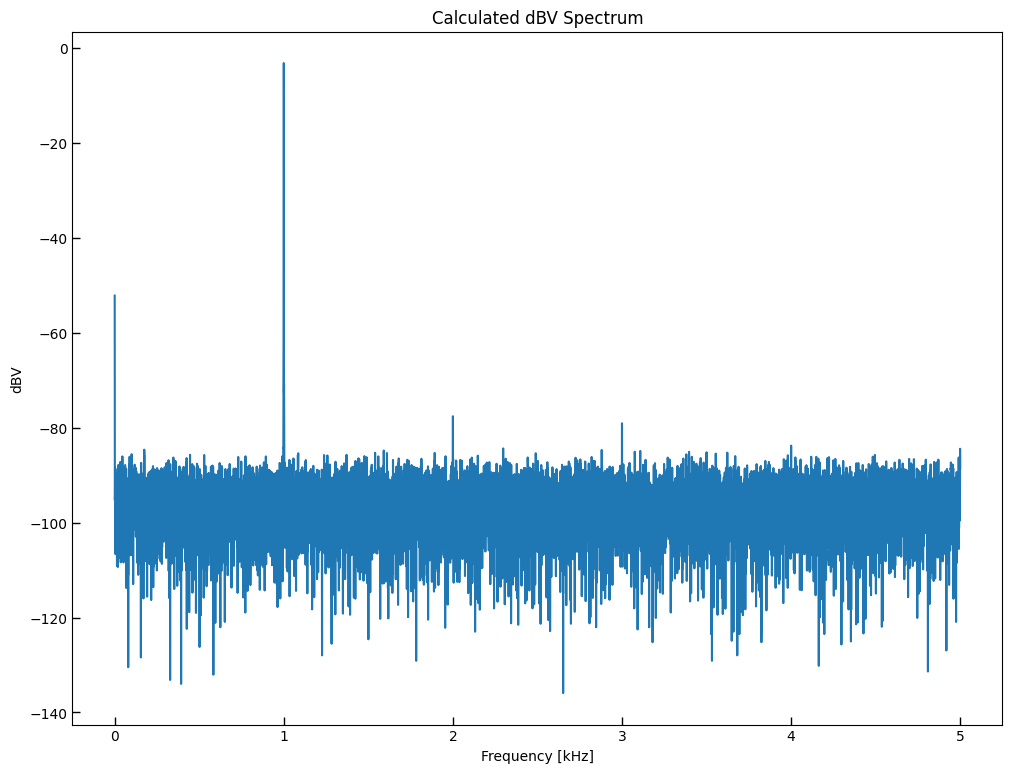

In [6]:
t1bf, t1bV = (np.loadtxt('./T1b/t1b 14 bit lin spect.csv', delimiter = ',', unpack=True, skiprows=2))

### We can use the formula dBV = -20 * log10(V/Vref) to convert from a linear scale to the dBV scale, with Vref = 1V:
t1b_calc_dBV = -(20 * np.log10(1/t1bV))

#Plot the converted spectrum
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(t1bf, t1b_calc_dBV)
plt.xlabel('Frequency [kHz]')
plt.ylabel('dBV')
plt.title('Calculated dBV Spectrum')
ax.tick_params(direction='in', length=6, width=1)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

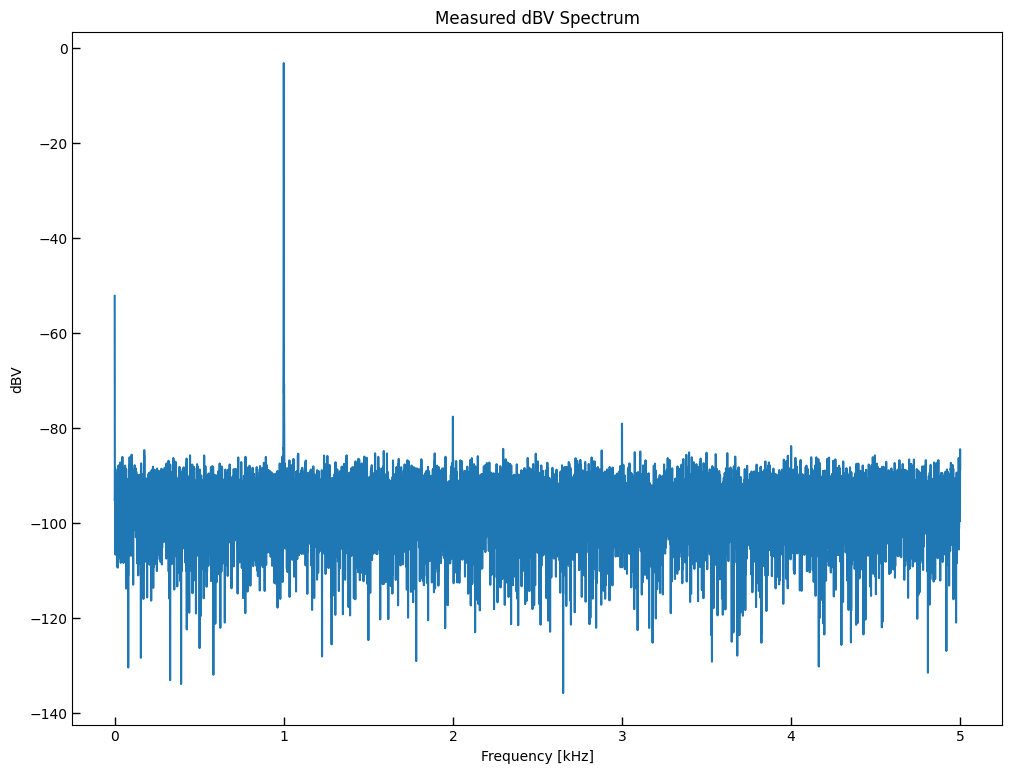

In [7]:
# Load Data
t1bf2, t1bdBV = (np.loadtxt('./T1b/t1b 14bit dbv spect.csv', delimiter = ',', unpack=True, skiprows=2))

#Plot data
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(t1bf, t1bdBV)
plt.xlabel('Frequency [kHz]')
plt.ylabel('dBV')
plt.title('Measured dBV Spectrum')

ax.tick_params(direction='in', length=6, width=1)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

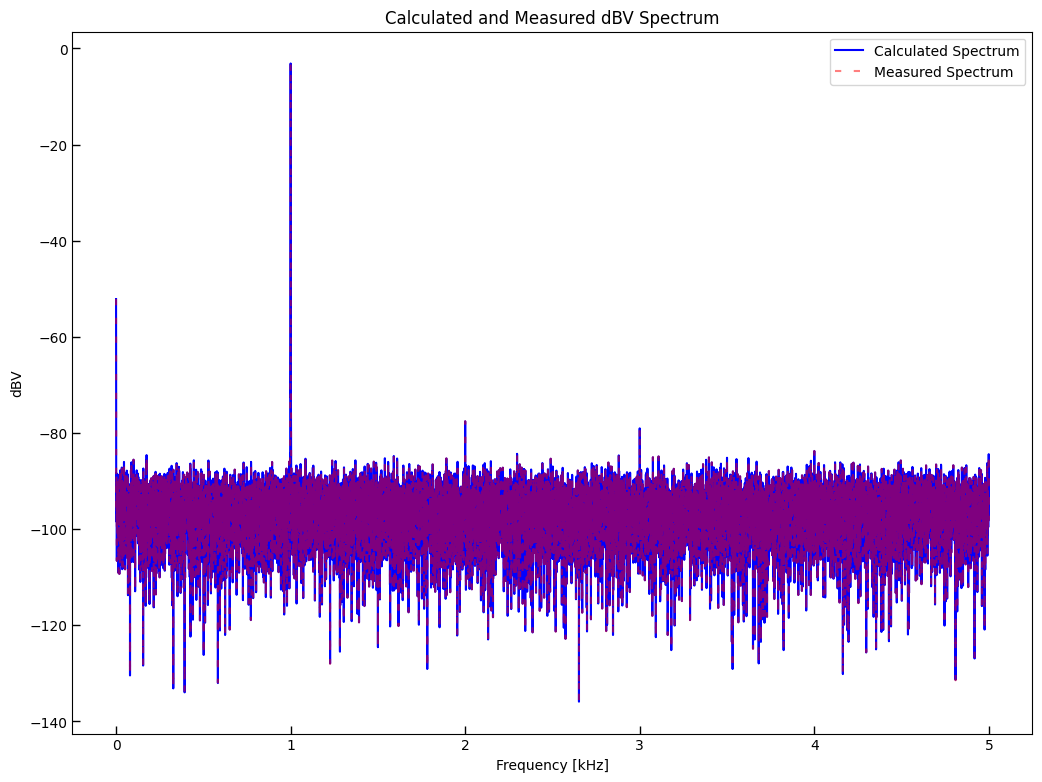

In [8]:
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(t1bf, t1b_calc_dBV, 'b-', label='Calculated Spectrum')
plt.plot(t1bf, t1bdBV, 'r:', dashes=(3,6), markevery=5, 
         #'r--', 
         alpha=0.5, label='Measured Spectrum')
plt.xlabel('Frequency [kHz]')
plt.ylabel('dBV')
plt.title('Calculated and Measured dBV Spectrum')
plt.legend()
ax.tick_params(direction='in', length=6, width=1)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1)

plt.show

#### Task 2a
Choose oscilloscope parameters such that you have a spectrum with maximum frequency of
100 kHz, Blackman window and 16384 points. Measure the spectra of sine signals with frequencies of 10 kHz, 90 kHz, 110 kHz, 190 kHz, 210 kHz and 290 kHz.
What do you observe? From your observation, derive an equation for the apparent frequency as a
function of the real generator frequency.

In [9]:
t2a10f, t2a10dbv = np.loadtxt('./T2a/t2a 010.csv', delimiter = ',', unpack=True, skiprows=2)
t2a90f, t2a90dbv = np.loadtxt('./T2a/t2a 090.csv', delimiter = ',', unpack=True, skiprows=2)
t2a110f, t2a110dbv = np.loadtxt('./T2a/t2a 110.csv', delimiter = ',', unpack=True, skiprows=2)
t2a190f, t2a190dbv = np.loadtxt('./T2a/t2a 190.csv', delimiter = ',', unpack=True, skiprows=2)
t2a210f, t2a210dbv = np.loadtxt('./T2a/t2a 210.csv', delimiter = ',', unpack=True, skiprows=2)
t2a290f, t2a290dbv = np.loadtxt('./T2a/t2a 290.csv', delimiter = ',', unpack=True, skiprows=2)

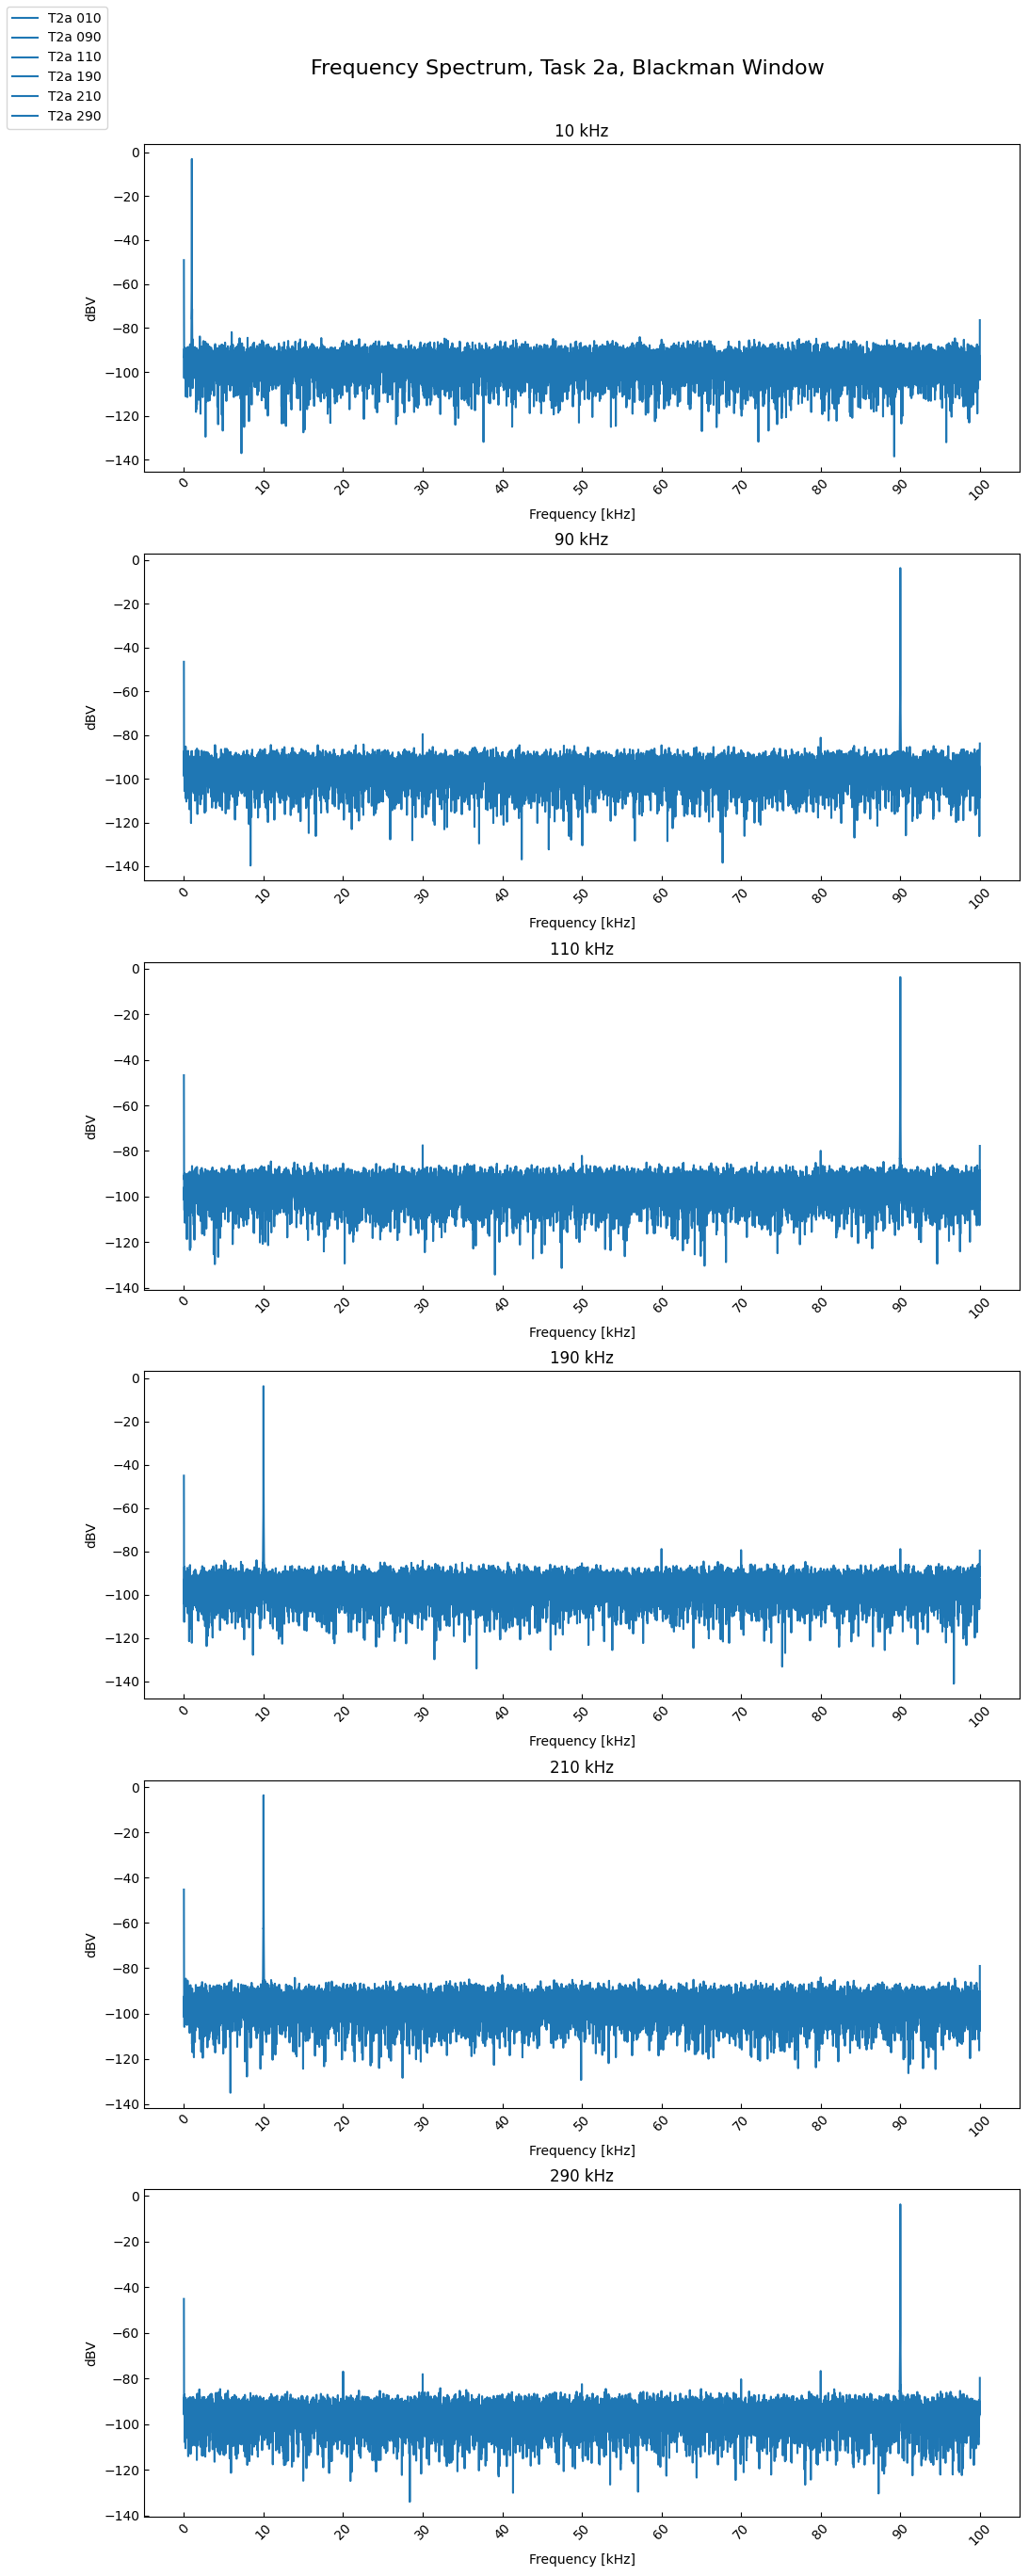

In [10]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12, 30))

axs[0].plot(t2a10f, t2a10dbv, label='T2a 010')
axs[0].set_title('10 kHz')
axs[1].plot(t2a90f, t2a90dbv, label='T2a 090')
axs[1].set_title('90 kHz')
axs[2].plot(t2a110f, t2a110dbv, label='T2a 110')
axs[2].set_title('110 kHz')
axs[3].plot(t2a190f, t2a190dbv, label='T2a 190')
axs[3].set_title('190 kHz')
axs[4].plot(t2a210f, t2a210dbv, label='T2a 210')
axs[4].set_title('210 kHz')
axs[5].plot(t2a290f, t2a290dbv, label='T2a 290')
axs[5].set_title('290 kHz')

for ax in axs.flat:
    ax.set(xlabel='Frequency [kHz]', ylabel='dBV')
    ax.margins(x=0.05)
    ax.tick_params(axis='x', labelrotation=45, labelright=True)
    ax.tick_params(axis='both', direction='in')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x):d}" if int(x) == x else ""))

fig.subplots_adjust(hspace=.25, top=0.95)
fig.legend(loc='upper left')
plt.suptitle('Frequency Spectrum, Task 2a, Blackman Window', fontsize=16)
plt.show()

#### Task 2b
Choose parameters such that you have a spectrum with maximum frequency of 100 kHz,
Blackman window and 16384 points. Measure the spectra of square signals with frequencies of 5
kHz and 7 kHz.
Why do the spectra look so different? Measure the peak heights of the 10 peaks in the 5 kHz
spectrum and of the first 20 peaks in the 7 kHz spectrum. Plot the peak heights vs. frequency and
compare with the theoretical expression. What do you observe? Explain.

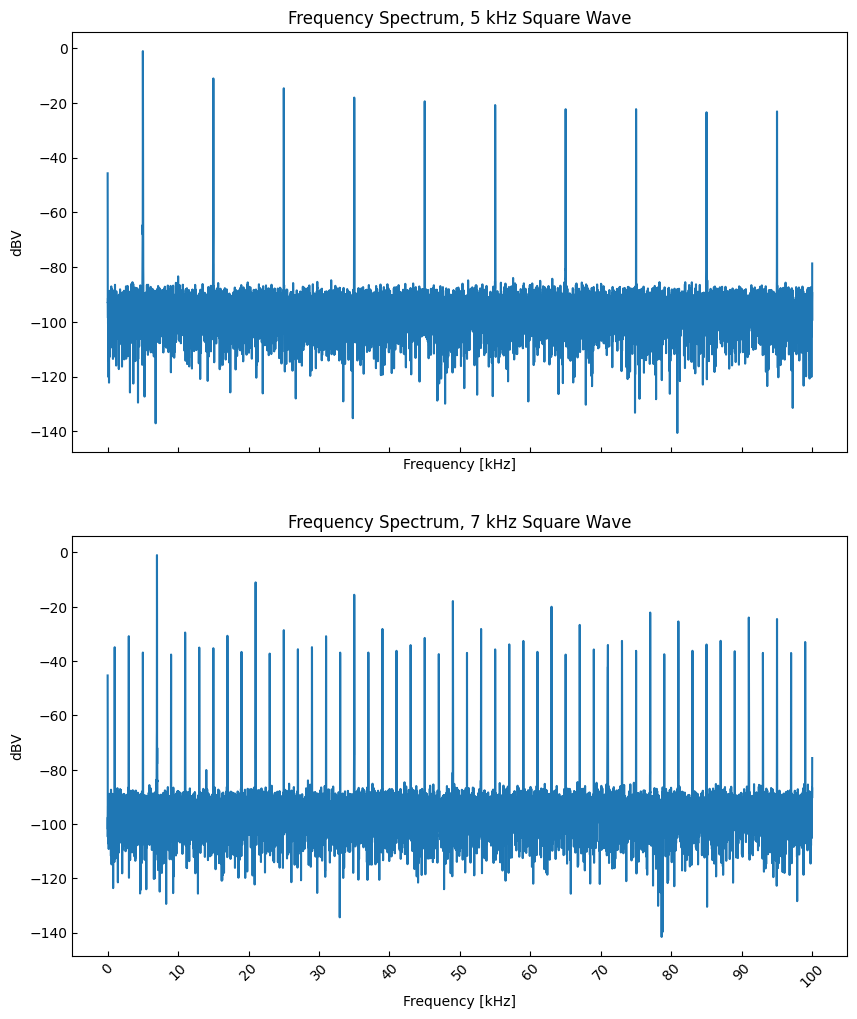

In [11]:
#Import data
t2b5f, t2b5dbv = np.loadtxt('./T2b/t2b 5.csv', delimiter = ',', unpack=True, skiprows=2)
t2b7f, t2b7dbv = np.loadtxt('./T2b/t2b 7.csv', delimiter = ',', unpack=True, skiprows=2)

# Create figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), sharex=True)

# Plot data and set titles
axs[0].plot(t2b5f, t2b5dbv)
axs[0].set_title('Frequency Spectrum, 5 kHz Square Wave')
axs[1].plot(t2b7f, t2b7dbv)
axs[1].set_title('Frequency Spectrum, 7 kHz Square Wave')

# Set x-tick labels and step
for ax in axs.flat:
    ax.set(xlabel='Frequency [kHz]', ylabel='dBV')
    ax.set_xticks(range(0, 101, 10))
    ax.tick_params(axis='x', labelrotation=45, labelright=True)
    ax.tick_params(axis='both', direction='in')

# Adjust margins and show figure
fig.subplots_adjust(hspace=0.2)
plt.show()

#### Task 3a
Measure the spectra of a square signal using a rectangular, a Hann and a flat-top window. Use
the following parameters: time constant of 1 ms, 20 kS, 16384 points in the spectrum and a frequency of 1 kHz.
Compare the spectra. What do you observe? Which windowing method has the worst amplitude
resolution? Which windowing method has the worst frequency resolution?

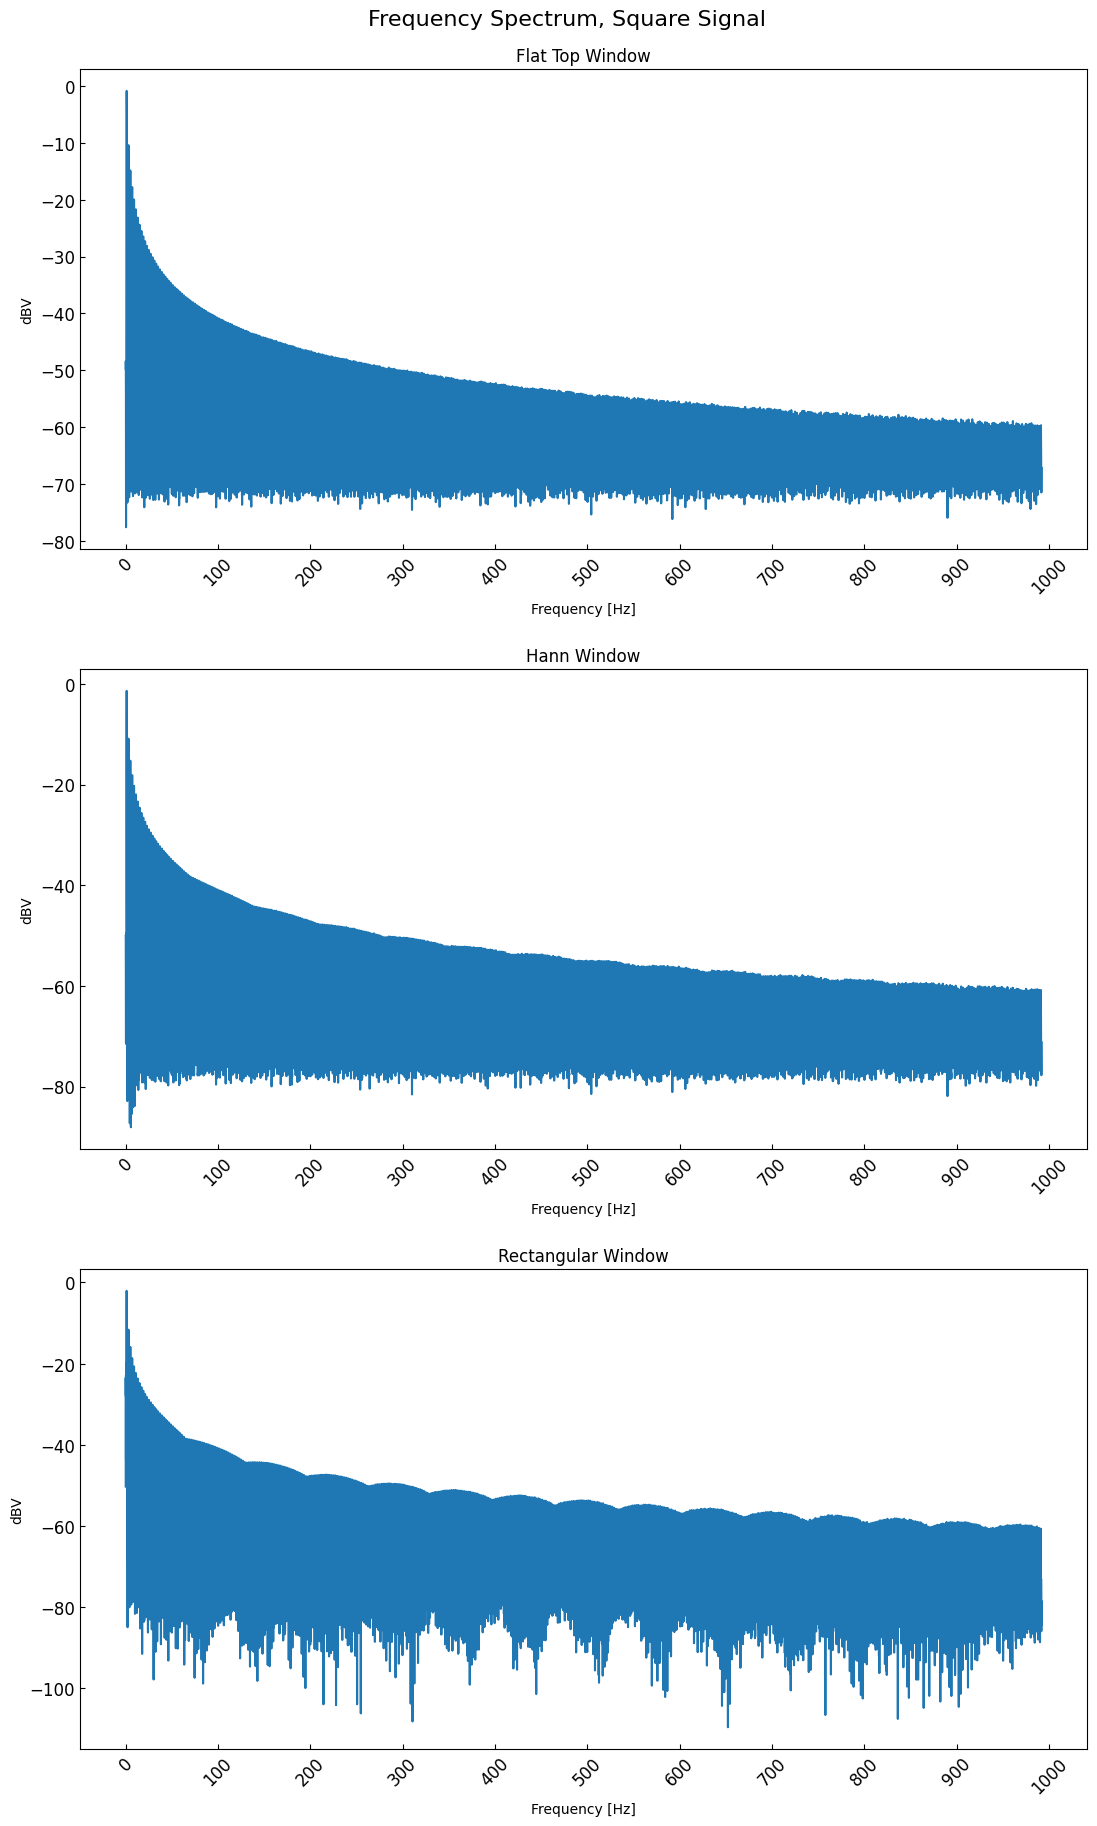

In [12]:
# Import data
t3aflatf, t3aflatdbV = np.loadtxt('./T3a/t3a flat top.csv', delimiter=',', unpack=True, skiprows=2)
t3ahannf, t3ahanndbV = np.loadtxt('./T3a/t3a hann.csv', delimiter=',', unpack=True, skiprows=2)
t3arectf, t3arectdbV = np.loadtxt('./T3a/t3a rect.csv', delimiter=',', unpack=True, skiprows=2)

# Create figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(13, 20), sharex=False, gridspec_kw={'hspace': 0.25})

# Plot data and set titles
axs[0].plot(t3aflatf, t3aflatdbV)
axs[0].set_title('Flat Top Window')
axs[1].plot(t3ahannf, t3ahanndbV)
axs[1].set_title('Hann Window')
axs[2].plot(t3arectf, t3arectdbV)
axs[2].set_title('Rectangular Window')

# Set common x and y labels
for ax in axs.flat:
    ax.set(xlabel='Frequency [Hz]', ylabel='dBV')
    ax.set_xticks(range(0, 1100, 100))
    ax.tick_params(axis='x', labelrotation=45, labelright=True)
    ax.tick_params(direction='in', labelsize=12)

# Show figure
plt.suptitle('Frequency Spectrum, Square Signal', fontsize=16)
fig.subplots_adjust(top=0.95)
plt.show()


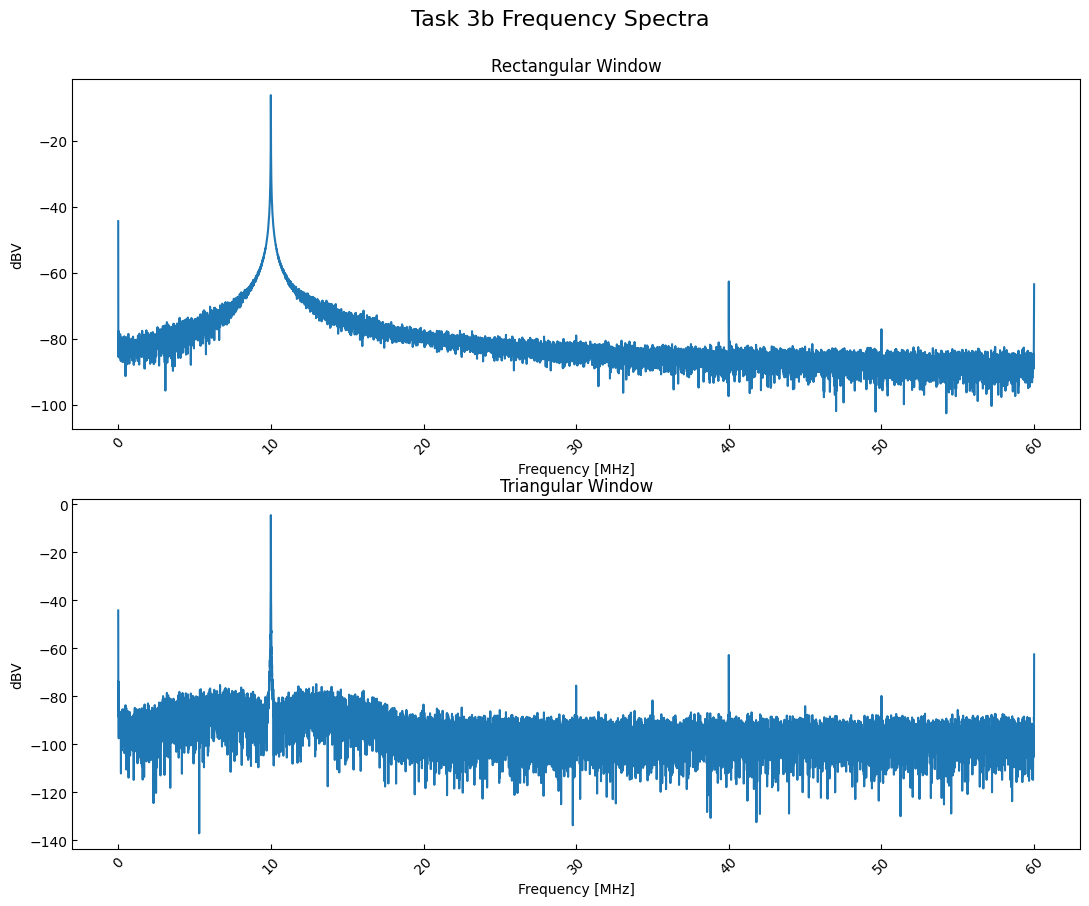

In [13]:
#Import data
t3brectf, t3brectdbv = np.loadtxt('./T3b/t3b rect 10.csv', delimiter = ',', unpack=True, skiprows=2)
t3btriangf, t2btriangdbv = np.loadtxt('./T3b/t3b triang 10.csv', delimiter = ',', unpack=True, skiprows=2)

# Create figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(13, 10), sharex=False)

# Plot data and set titles
axs[0].plot(t3brectf, t3brectdbv)
axs[0].set_title('Rectangular Window')
axs[1].plot(t3btriangf, t2btriangdbv)
axs[1].set_title('Triangular Window')

# Set x-tick labels and step
for ax in axs.flat:
    ax.set(xlabel='Frequency [MHz]', ylabel='dBV')
    ax.set_xticks(np.arange(0, 61, 10))
    ax.tick_params(axis='x', labelrotation=45, labelright=True)
    ax.tick_params(axis='both', direction='in')

# Adjust margins and show figure
fig.subplots_adjust(hspace=0.2)
plt.suptitle('Task 3b Frequency Spectra', fontsize=16, y=0.95)
plt.show()

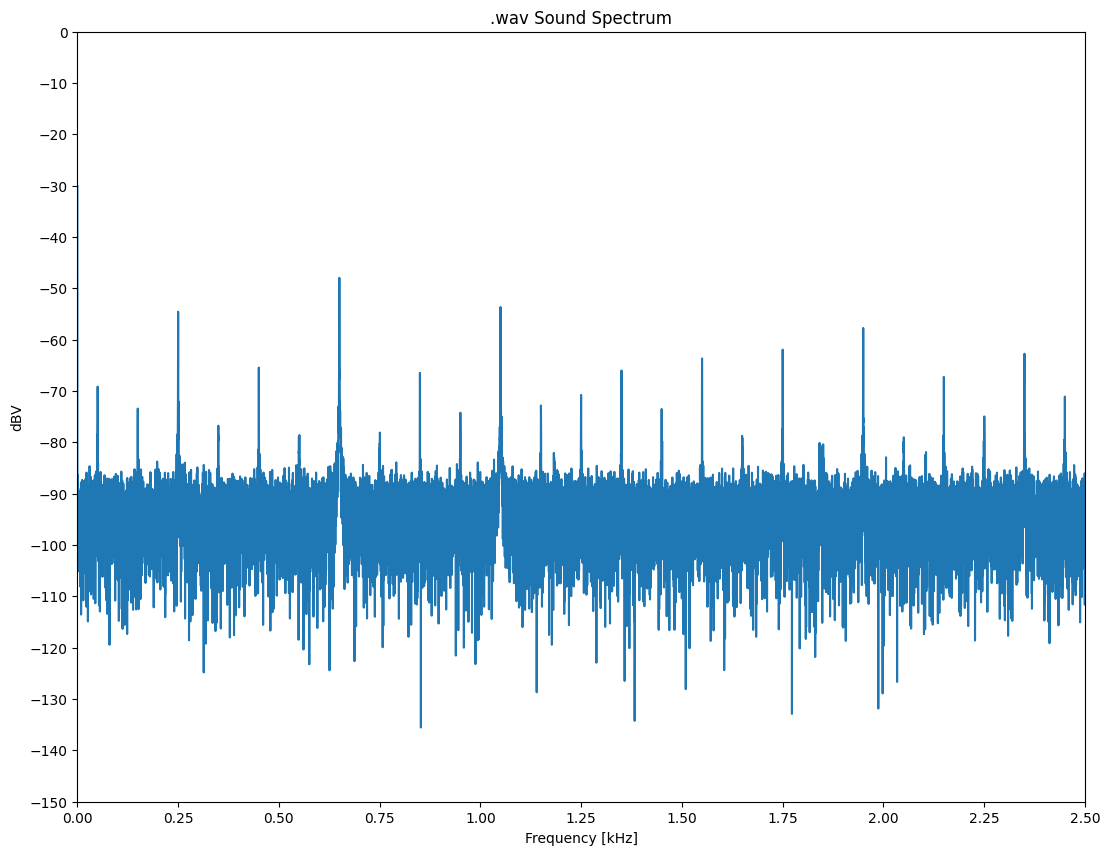

In [20]:
# Load the data
t4f, t4db = np.loadtxt('./T4/t4.csv', delimiter=',', unpack=True, skiprows=2)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(13, 10))

# Plot the data and set the axis labels
ax.plot(t4f, t4db)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('dBV')

# Set the axis limits and ticks
ax.set_xlim([0, 2.5])
ax.set_xticks(np.arange(0, 2.6, 0.25))
ax.set_ylim([-150, 0])
ax.set_yticks(np.arange(-150, 1, 10))

# Add the title
plt.title('.wav Sound Spectrum')

# Show the plot
plt.show()


$\text{sign}(\sin(1600\pi t) + 2\text{sign}(500t)\left(-0.5+\lvert 500t\rvert- \text{int}\left(\lvert 500t\rvert\right)\right) + 4\left(\text{sign}\left(-0.5+\lvert 650t\rvert-\text{int}\left(\lvert 650t\rvert\right)\right)\cdot\left(-0.5+\lvert 650t\rvert- \text{int}\left(\lvert 650t\rvert\right)\right)-1\right)\sin(800\pi t+\frac{\pi}{6})$

$\text{sign}(\sin(1600\pi t) + 2\cdot\text{sign}(500t)\cdot\left(-0.5+\lvert 500t\rvert-\int \lvert 500t\rvert\right) + 4\cdot\text{sign}\left(-0.5+\lvert 650t\rvert-\int \lvert 650t\rvert\right)\cdot\left(-0.5+\lvert 650t\rvert-\int \lvert 650t\rvert-1\right)\sin\left(800\pi t\right))$